# Méthodes de recherche linéaire

Considérons $f \in C^2$.  Une méthode de descente consiste à calculer itérativement
$$
x_{k+1} = x_k + \alpha^* d_k
$$
où $\alpha^*$ minimise approximativement $f(x_k - \alpha d_k)$.

In [1]:
using LinearAlgebra
using BenchmarkTools
using Optim
using Plots

Plusieurs techniques de recherche linéaire sont proposées en Julia, comme expliqué à la page https://github.com/JuliaNLSolvers/LineSearches.jl

Considérons à nouveau l'exemple de Rosenbrock, dont l'expression mathématique est

$$
f(x,y) = (1-x)^2 + 100(y-x^2)^2
$$

Son gradient peut être calculé comme

$$
\nabla f(x,y) =
\begin{pmatrix}
-2(1-x)-400x(y-x^2) \\
200(y-x^2)
\end{pmatrix}
$$

$$
\nabla^2 f(x,y) =
\begin{pmatrix}
2 - 400(y-x^2) + 800x^2 & -400x \\
-400x & 200
\end{pmatrix}
=
\begin{pmatrix}
2 - 400y + 1200x^2 & -400x \\
-400x & 200
\end{pmatrix}
$$

Le minimiseur est situé en $(1,1)$. En effet,
$$
\nabla f(1,1) = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$
et
$$
\nabla^2 f(1,1) =
\begin{pmatrix}
802 & -400 \\ -400 & 200
\end{pmatrix}
$$
Les déterminants des mineurs principaux sont positifs comme ils valent respectivement 802 et $802\times200-400^2= 400$, aussi la matrice hessienne est définie positive.

In [51]:
# Rosenbrock function
# Source: https://bitbucket.org/lurk3r/optim.jl

function rosenbrock(x::Vector)
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

function rosenbrock_gradient!(storage::Vector, x::Vector)
    storage[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    storage[2] = 200.0 * (x[2] - x[1]^2)
end

function rosenbrock_hessian!(storage::Matrix, x::Vector)
    storage[1, 1] = 2.0 - 400.0 * x[2] + 1200.0 * x[1]^2
    storage[1, 2] = -400.0 * x[1]
    storage[2, 1] = -400.0 * x[1]
    storage[2, 2] = 200.0
end

rosenbrock_hessian! (generic function with 1 method)

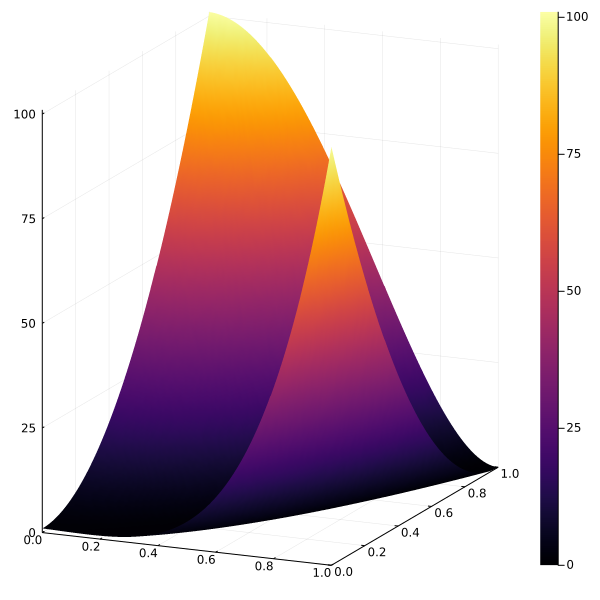

In [63]:
using Plots

default(size=(600,600))
x, y = 0:0.01:1.0, 0:0.01:1.0
z = Surface((x,y)->rosenbrock([x,y]), x, y)
surface(x,y,z, linealpha = 0.3)

In [64]:
Plots.contour(x,y,z, linealpha = 0.1, levels=2500)

Nous pouvons résoudre le problème d'optimisation avec la fonction `optimize` présente dans la librairie `Optim.jl`:

In [65]:
res = optimize(rosenbrock, rosenbrock_gradient!,
               [20.0, 20.0],
               Optim.GradientDescent(),
               Optim.Options(g_tol = 1e-12,
                             store_trace = true,
                             show_trace = true))

Iter     Function value   Gradient norm 
     0     1.444036e+07     3.040038e+06
 * time: 0.0
     1     2.680958e+06     8.881503e+05
 * time: 0.0
     2     6.986401e+02     4.430920e+03
 * time: 0.0009999275207519531
     3     1.422712e+01     2.423975e+02
 * time: 0.0009999275207519531
     4     1.241984e+01     7.750435e-01
 * time: 0.0009999275207519531
     5     1.241547e+01     1.200614e+01
 * time: 0.002000093460083008
     6     1.241110e+01     8.544267e-01
 * time: 0.002000093460083008
     7     1.241103e+01     8.557174e-01
 * time: 0.002000093460083008
     8     1.241096e+01     8.544292e-01
 * time: 0.003000020980834961
     9     1.241089e+01     8.557152e-01
 * time: 0.003000020980834961
    10     1.241081e+01     8.544285e-01
 * time: 0.003000020980834961
    11     1.241074e+01     8.557130e-01
 * time: 0.003000020980834961
    12     1.241067e+01     8.544278e-01
 * time: 0.003999948501586914
    13     1.241060e+01     8.557108e-01
 * time: 0.003999948501586

   116     1.240314e+01     8.543935e-01
 * time: 0.023999929428100586
   117     1.240307e+01     8.555977e-01
 * time: 0.02500009536743164
   118     1.240300e+01     8.543929e-01
 * time: 0.02500009536743164
   119     1.240293e+01     8.555956e-01
 * time: 0.02500009536743164
   120     1.240285e+01     8.543922e-01
 * time: 0.02500009536743164
   121     1.240278e+01     8.555934e-01
 * time: 0.026000022888183594
   122     1.240271e+01     8.543915e-01
 * time: 0.026000022888183594
   123     1.240264e+01     8.555912e-01
 * time: 0.026000022888183594
   124     1.240256e+01     8.543909e-01
 * time: 0.026000022888183594
   125     1.240249e+01     8.555891e-01
 * time: 0.026999950408935547
   126     1.240242e+01     8.543902e-01
 * time: 0.026999950408935547
   127     1.240235e+01     8.555869e-01
 * time: 0.026999950408935547
   128     1.240227e+01     8.543896e-01
 * time: 0.0280001163482666
   129     1.240220e+01     8.555848e-01
 * time: 0.0280001163482666
   130     1.2

   233     1.239467e+01     8.554737e-01
 * time: 0.06200003623962402
   234     1.239460e+01     8.543543e-01
 * time: 0.06200003623962402
   235     1.239453e+01     8.554716e-01
 * time: 0.06200003623962402
   236     1.239445e+01     8.543536e-01
 * time: 0.06299996376037598
   237     1.239438e+01     8.554695e-01
 * time: 0.06299996376037598
   238     1.239431e+01     8.543530e-01
 * time: 0.06299996376037598
   239     1.239424e+01     8.554674e-01
 * time: 0.06299996376037598
   240     1.239416e+01     8.543523e-01
 * time: 0.06400012969970703
   241     1.239409e+01     8.554653e-01
 * time: 0.06400012969970703
   242     1.239402e+01     8.543516e-01
 * time: 0.06400012969970703
   243     1.239395e+01     8.554632e-01
 * time: 0.06400012969970703
   244     1.239387e+01     8.543510e-01
 * time: 0.06500005722045898
   245     1.239380e+01     8.554611e-01
 * time: 0.06500005722045898
   246     1.239373e+01     8.543503e-01
 * time: 0.06500005722045898
   247     1.239366e

   351     1.238612e+01     8.553499e-01
 * time: 0.09299993515014648
   352     1.238605e+01     8.543148e-01
 * time: 0.09299993515014648
   353     1.238598e+01     8.553478e-01
 * time: 0.09299993515014648
   354     1.238591e+01     8.543141e-01
 * time: 0.09299993515014648
   355     1.238583e+01     8.553458e-01
 * time: 0.09400010108947754
   356     1.238576e+01     8.543134e-01
 * time: 0.09400010108947754
   357     1.238569e+01     8.553437e-01
 * time: 0.09400010108947754
   358     1.238562e+01     8.543127e-01
 * time: 0.09500002861022949
   359     1.238555e+01     8.553416e-01
 * time: 0.09500002861022949
   360     1.238547e+01     8.543121e-01
 * time: 0.09500002861022949
   361     1.238540e+01     8.553395e-01
 * time: 0.09599995613098145
   362     1.238533e+01     8.543114e-01
 * time: 0.09599995613098145
   363     1.238526e+01     8.553375e-01
 * time: 0.09599995613098145
   364     1.238518e+01     8.543107e-01
 * time: 0.0970001220703125
   365     1.238511e+

   469     1.237757e+01     8.552283e-01
 * time: 0.12199997901916504
   470     1.237750e+01     8.542749e-01
 * time: 0.1230001449584961
   471     1.237743e+01     8.552263e-01
 * time: 0.1230001449584961
   472     1.237736e+01     8.542742e-01
 * time: 0.1230001449584961
   473     1.237728e+01     8.552242e-01
 * time: 0.1230001449584961
   474     1.237721e+01     8.542735e-01
 * time: 0.1230001449584961
   475     1.237714e+01     8.552222e-01
 * time: 0.12400007247924805
   476     1.237707e+01     8.542729e-01
 * time: 0.12400007247924805
   477     1.237699e+01     8.552202e-01
 * time: 0.12400007247924805
   478     1.237692e+01     8.542722e-01
 * time: 0.12400007247924805
   479     1.237685e+01     8.552181e-01
 * time: 0.125
   480     1.237678e+01     8.542715e-01
 * time: 0.125
   481     1.237670e+01     8.552161e-01
 * time: 0.125
   482     1.237663e+01     8.542708e-01
 * time: 0.125
   483     1.237656e+01     8.552140e-01
 * time: 0.125
   484     1.237649e+01  

   588     1.236895e+01     8.542347e-01
 * time: 0.1510000228881836
   589     1.236888e+01     8.551069e-01
 * time: 0.1510000228881836
   590     1.236880e+01     8.542340e-01
 * time: 0.1510000228881836
   591     1.236873e+01     8.551049e-01
 * time: 0.1510000228881836
   592     1.236866e+01     8.542334e-01
 * time: 0.15199995040893555
   593     1.236859e+01     8.551029e-01
 * time: 0.15199995040893555
   594     1.236851e+01     8.542327e-01
 * time: 0.15199995040893555
   595     1.236844e+01     8.551009e-01
 * time: 0.15199995040893555
   596     1.236837e+01     8.542320e-01
 * time: 0.15199995040893555
   597     1.236830e+01     8.550989e-01
 * time: 0.1530001163482666
   598     1.236822e+01     8.542313e-01
 * time: 0.1530001163482666
   599     1.236815e+01     8.550969e-01
 * time: 0.1530001163482666
   600     1.236808e+01     8.542306e-01
 * time: 0.15400004386901855
   601     1.236801e+01     8.550949e-01
 * time: 0.15400004386901855
   602     1.236793e+01    

   706     1.236039e+01     8.541943e-01
 * time: 0.1790001392364502
   707     1.236032e+01     8.549896e-01
 * time: 0.18000006675720215
   708     1.236025e+01     8.541936e-01
 * time: 0.18000006675720215
   709     1.236017e+01     8.549876e-01
 * time: 0.18000006675720215
   710     1.236010e+01     8.541929e-01
 * time: 0.18000006675720215
   711     1.236003e+01     8.549856e-01
 * time: 0.18000006675720215
   712     1.235996e+01     8.541922e-01
 * time: 0.1809999942779541
   713     1.235988e+01     8.549837e-01
 * time: 0.1809999942779541
   714     1.235981e+01     8.541915e-01
 * time: 0.1809999942779541
   715     1.235974e+01     8.549817e-01
 * time: 0.1809999942779541
   716     1.235967e+01     8.541908e-01
 * time: 0.1809999942779541
   717     1.235959e+01     8.549797e-01
 * time: 0.18199992179870605
   718     1.235952e+01     8.541901e-01
 * time: 0.18199992179870605
   719     1.235945e+01     8.549778e-01
 * time: 0.18199992179870605
   720     1.235938e+01   

 * time: 0.2070000171661377
   824     1.235183e+01     8.541535e-01
 * time: 0.2070000171661377
   825     1.235176e+01     8.548743e-01
 * time: 0.2070000171661377
   826     1.235169e+01     8.541528e-01
 * time: 0.20799994468688965
   827     1.235162e+01     8.548724e-01
 * time: 0.20799994468688965
   828     1.235154e+01     8.541521e-01
 * time: 0.20799994468688965
   829     1.235147e+01     8.548704e-01
 * time: 0.2090001106262207
   830     1.235140e+01     8.541514e-01
 * time: 0.2090001106262207
   831     1.235132e+01     8.548685e-01
 * time: 0.2090001106262207
   832     1.235125e+01     8.541507e-01
 * time: 0.2090001106262207
   833     1.235118e+01     8.548666e-01
 * time: 0.21000003814697266
   834     1.235111e+01     8.541500e-01
 * time: 0.21000003814697266
   835     1.235103e+01     8.548646e-01
 * time: 0.21000003814697266
   836     1.235096e+01     8.541493e-01
 * time: 0.21000003814697266
   837     1.235089e+01     8.548627e-01
 * time: 0.2109999656677246

   942     1.234327e+01     8.541125e-01
 * time: 0.2350001335144043
   943     1.234320e+01     8.547610e-01
 * time: 0.2350001335144043
   944     1.234312e+01     8.541118e-01
 * time: 0.23600006103515625
   945     1.234305e+01     8.547591e-01
 * time: 0.23600006103515625
   946     1.234298e+01     8.541111e-01
 * time: 0.23600006103515625
   947     1.234291e+01     8.547572e-01
 * time: 0.23600006103515625
   948     1.234283e+01     8.541104e-01
 * time: 0.23600006103515625
   949     1.234276e+01     8.547553e-01
 * time: 0.23600006103515625
   950     1.234269e+01     8.541097e-01
 * time: 0.2369999885559082
   951     1.234262e+01     8.547534e-01
 * time: 0.2369999885559082
   952     1.234254e+01     8.541090e-01
 * time: 0.2369999885559082
   953     1.234247e+01     8.547515e-01
 * time: 0.2369999885559082
   954     1.234240e+01     8.541083e-01
 * time: 0.23799991607666016
   955     1.234233e+01     8.547496e-01
 * time: 0.23799991607666016
   956     1.234225e+01   

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.233906e+01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 1.04e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.09e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.26e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.88e-06 ≰ 0.0e+00
    |g(x)|                 = 8.54e-01 ≰ 1.0e-12

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2506
    ∇f(x) calls:   2506


In [66]:
res = optimize(rosenbrock, rosenbrock_gradient!,
               [20.0, 20.0],
               Optim.BFGS(),
               Optim.Options(g_tol = 1e-12,
                             store_trace = true,
                             show_trace = true))

Iter     Function value   Gradient norm 
     0     1.444036e+07     3.040038e+06
 * time: 0.0
     1     2.680958e+06     8.881503e+05
 * time: 0.0
     2     6.650571e+05     5.858550e+05
 * time: 0.0
     3     2.806304e+02     7.167345e+02
 * time: 0.0010001659393310547
     4     2.794972e+02     3.772877e+01
 * time: 0.0010001659393310547
     5     2.694629e+02     8.824642e+02
 * time: 0.0010001659393310547
     6     2.679257e+02     1.073784e+03
 * time: 0.0010001659393310547
     7     2.615432e+02     1.595776e+03
 * time: 0.0010001659393310547
     8     2.480323e+02     1.178047e+03
 * time: 0.002000093460083008
     9     2.411404e+02     6.281265e+02
 * time: 0.002000093460083008
    10     2.318473e+02     2.328093e+02
 * time: 0.002000093460083008
    11     2.293179e+02     7.429504e+02
 * time: 0.002000093460083008
    12     2.271862e+02     1.282135e+03
 * time: 0.002000093460083008
    13     2.195866e+02     1.511525e+03
 * time: 0.003000020980834961
    14     

 * Status: success

 * Candidate solution
    Final objective value:     0.000000e+00

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.58e-12 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.58e-12 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.41e-23 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = Inf ≰ 0.0e+00
    |g(x)|                 = 0.00e+00 ≤ 1.0e-12

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    101
    f(x) calls:    280
    ∇f(x) calls:   280


In [67]:
using BenchmarkTools

@benchmark res = optimize(rosenbrock, rosenbrock_gradient!,
                          [0.0, 0.0], Optim.BFGS(),
                          Optim.Options(g_tol = 1e-12, store_trace = true, show_trace = false))

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  29.000 μs …   9.572 ms  ┊ GC (min … max):  0.00% … 99.35%
 Time  (median):     30.800 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   36.009 μs ± 182.531 μs  ┊ GC (mean ± σ):  10.11% ±  1.99%

   ▂█▅▂                                                         
  ▃████▇▆▅▄▄▄▄▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▂▂▁▂▂▂ ▃
  29 μs           Histogram: frequency by time         52.9 μs <

 Memory estimate: 29.39 KiB, allocs estimate: 482.

In [68]:
iter = Optim.trace(res)

102-element Vector{OptimizationState{Float64, BFGS{LineSearches.InitialStatic{Float64}, LineSearches.HagerZhang{Float64, Base.RefValue{Bool}}, Nothing, Nothing, Flat}}}:
      0     1.444036e+07     3.040038e+06
 * time: 0.0

      1     2.680958e+06     8.881503e+05
 * time: 0.0

      2     6.650571e+05     5.858550e+05
 * time: 0.0

      3     2.806304e+02     7.167345e+02
 * time: 0.0010001659393310547

      4     2.794972e+02     3.772877e+01
 * time: 0.0010001659393310547

      5     2.694629e+02     8.824642e+02
 * time: 0.0010001659393310547

      6     2.679257e+02     1.073784e+03
 * time: 0.0010001659393310547

      7     2.615432e+02     1.595776e+03
 * time: 0.0010001659393310547

      8     2.480323e+02     1.178047e+03
 * time: 0.002000093460083008

      9     2.411404e+02     6.281265e+02
 * time: 0.002000093460083008

     10     2.318473e+02     2.328093e+02
 * time: 0.002000093460083008

     11     2.293179e+02     7.429504e+02
 * time: 0.002000093460083008



## Différentiation en Julia

Calculer le gradient et la matrice hessienne est souvent ardu, et même pour des fonctions simples, cela peut s'avérer une tâche pénible. Afin d'alléger ce coût, il est possible d'utiliser des dérivées numériques ou la différentiation automatique.

### Dérivées numériques

Des fonctions de dérivation numérique sont fournies dans la librairie `Calculus`, comme illustré ci-dessous.

In [10]:
using Calculus, LinearAlgebra
rg = Calculus.gradient(rosenbrock)

#2 (generic function with 1 method)

Évaluons la fonction de gradient, nouvellement construite, à la solution [1,1].

In [11]:
gsol = rg([1,1])

2-element Vector{Float64}:
  1.4667356107373247e-8
 -1.1102239280930583e-14

Nous sommes proches de zéro, mais il y a des erreurs d'approximation, lesquelles peuvent empêcher la convergence vers une solution correcte, ou, à tout le mois, nuire à la precision de la solution, comme

In [12]:
norm(gsol)

1.466735610737745e-8

In [13]:
storage = [0.0,0.0]
function rg!(storage::Vector, x::Vector)
    s = rg(x)
    storage[1:length(s)] = s[1:length(s)]
end

rg! (generic function with 1 method)

In [14]:
storage

2-element Vector{Float64}:
 0.0
 0.0

In [15]:
@benchmark res = optimize(rosenbrock, rg!,
               [0.0, 0.0],
               Optim.BFGS(),
               Optim.Options(g_tol = 1e-12,
                             store_trace = true,
                             show_trace = false))

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  38.300 μs …  10.592 ms  ┊ GC (min … max):  0.00% … 99.09%
 Time  (median):     40.900 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   50.765 μs ± 228.113 μs  ┊ GC (mean ± σ):  11.77% ±  2.62%

  ▆█▇▆▄▃▂▂▁                                                    ▂
  ███████████▇▆▇▆▆▅█▇▆▅▅▅▇▇▆▅▅▅▁▅▆▃▄▄▃▄▅▅▇▇▆▅▇▇▆▅▅▇██▆▅▆▅▃▁▄▅▅ █
  38.3 μs       Histogram: log(frequency) by time       124 μs <

 Memory estimate: 41.42 KiB, allocs estimate: 702.

### Différentiation automatique

In [16]:
using ForwardDiff

g = x -> ForwardDiff.gradient(rosenbrock, x);
H = x -> ForwardDiff.hessian(rosenbrock, x)

function g!(storage::Vector, x::Vector)
    s = g(x)
    storage[1:length(s)] = s[1:length(s)]
end

g! (generic function with 1 method)

In [17]:
g([1.0,1.0])

2-element Vector{Float64}:
 -0.0
  0.0

In [18]:
res = optimize(rosenbrock, g!,
               [0.0, 0.0],
               Optim.BFGS(),
               Optim.Options(g_tol = 1e-12,
                             store_trace = true,
                             show_trace = false))

 * Status: success

 * Candidate solution
    Final objective value:     1.429810e-30

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.31e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.31e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.65e-21 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.35e+09 ≰ 0.0e+00
    |g(x)|                 = 4.35e-14 ≤ 1.0e-12

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    17
    f(x) calls:    55
    ∇f(x) calls:   55


In [19]:
@benchmark res = optimize(rosenbrock, g!,
                          [0.0, 0.0],
                          Optim.BFGS(),
                          Optim.Options(g_tol = 1e-12, store_trace = true, show_trace = false))

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  58.300 μs …  12.866 ms  ┊ GC (min … max):  0.00% … 98.50%
 Time  (median):     61.900 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   74.699 μs ± 261.044 μs  ┊ GC (mean ± σ):  10.23% ±  2.96%

  ▆█▆▅▄▂▁                                                      ▂
  ████████▇▆▅▄▆▅██▆▄▅▃▃▄▄▁▅▆▄▄▄▄▅▅▄▃▃▃▅▅▅▅▅▃▁▆█▇▆▅▄▄▄▅▅▆▆▅▅▆▆█ █
  58.3 μs       Histogram: log(frequency) by time       201 μs <

 Memory estimate: 52.59 KiB, allocs estimate: 867.

## Méthode de Newton

$$
x_{k+1} = x_k-\nabla^2 f(x_k)^{-1} \nabla f(x_k)
$$
ou
$$
\nabla^2 f(x_k) x_{k+1} = \nabla^2 f(x_k) x_k- \nabla f(x_k)
$$


In [82]:
function Newton(f::Function, g::Function, h:: Function,
        xstart::Vector, verbose::Bool = false,
        δ::Float64 = 1e-6, nmax::Int64 = 1000,
        record::Bool = false)

    k = 1
    x = xstart
    n = length(x)
    δ2 = δ*δ
    H = zeros(n,n)+I
    dfx = ones(n)
    
    if (verbose || record)
        fx = f(x)
        if (verbose) println("$k. f(x) = $fx, x = $x") end
    end
    
    if (record)
        iterates = [ fx x' ]
    end

    g(dfx, x)

    while (dot(dfx,dfx) > δ2 && k <= nmax)
        k += 1
        g(dfx,x)
        h(H,x)
        # Hs = dfx, x_{k+1} = x_k - s
        x -= H\dfx  # x = x - s
        if (verbose || record)
            fx = f(x)
            if (verbose) println("$k. f(x) = $fx, x = $x") end
        end
        if (record)
            iterates = [ iterates; fx x' ]
        end
    end
    
    if (record)
        return x, iterates
    else
        return x
    end    
end

Newton (generic function with 5 methods)

In [21]:
Newton(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [-100.0,100.0], true)

1. x = [-100.0, 100.0], f(x) = 9.801010201e9
2. x = [-99.99994898992475, 9999.989797984948], f(x) = 10200.9896959674 
3. x = [0.9999473760899633, -10199.97917119076], f(x) = 1.0405997390386257e10 
4. x = [0.9999473761157568, 0.9998947549993318], f(x) = 2.7692731928427748e-9 
5. x = [0.9999999999999847, 0.9999999972306961], f(x) = 7.668874361715257e-16 
6. x = [1.0, 1.0], f(x) = 0.0 
7. x = [1.0, 1.0], f(x) = 0.0 


2-element Vector{Float64}:
 1.0
 1.0

In [22]:
x, iter = Newton(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [-100.0,100.0], true, 1e-6, 1000, true)

1. x = [-100.0, 100.0], f(x) = 9.801010201e9
2. x = [-99.99994898992475, 9999.989797984948], f(x) = 10200.9896959674 
3. x = [0.9999473760899633, -10199.97917119076], f(x) = 1.0405997390386257e10 
4. x = [0.9999473761157568, 0.9998947549993318], f(x) = 2.7692731928427748e-9 
5. x = [0.9999999999999847, 0.9999999972306961], f(x) = 7.668874361715257e-16 
6. x = [1.0, 1.0], f(x) = 0.0 
7. x = [1.0, 1.0], f(x) = 0.0 


([1.0, 1.0], [9.801010201e9 -100.0 100.0; 10200.9896959674 -99.99994898992475 9999.989797984948; … ; 0.0 1.0 1.0; 0.0 1.0 1.0])

In [69]:
x, iter = Newton(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!, [0.1,0.1], true, 1e-6, 1000, true)

1. x = [0.1, 0.1], f(x) = 1.62
2. x = [0.047058823529411715, -0.0005882352941176533], f(x) = 0.9088824367524336 
3. x = [0.6577018390504759, 0.059686816685719464], f(x) = 14.021482329352807 
4. x = [0.662230971702106, 0.43852934683893946], f(x) = 0.1140879585557951 
5. x = [0.9986199278042607, 0.8840842304202894], f(x) = 1.2804645593601012 
6. x = [0.9986783274762165, 0.9973583983601714], f(x) = 1.7468182612872988e-6 
7. x = [0.9999999990984819, 0.9999982513810867], f(x) = 3.0513657168545884e-10 
8. x = [0.9999999999996851, 0.9999999999993703], f(x) = 9.913634717435086e-26 
9. x = [1.0, 1.0], f(x) = 0.0 


([1.0, 1.0], [1.62 0.1 0.1; 0.9088824367524336 0.047058823529411715 -0.0005882352941176533; … ; 9.913634717435086e-26 0.9999999999996851 0.9999999999993703; 0.0 1.0 1.0])

┌ Info: Saved animation to 
│   fn = C:\Users\slash\OneDrive - Universite de Montreal\Git\optim\NLP\iterationsRosenbrockNewton.gif
└ @ Plots C:\Users\slash\.julia\packages\Plots\YAlrZ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\slash\\OneDrive - Universite de Montreal\\Git\\optim\\NLP\\iterationsRosenbrockNewton.gif")
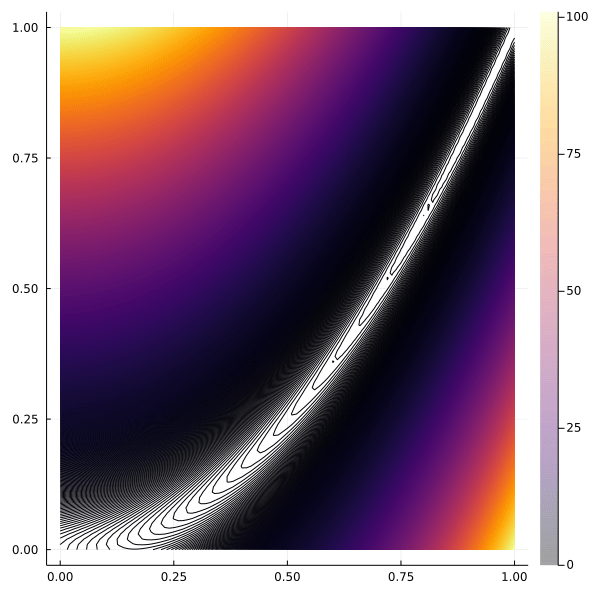

In [70]:
niter, d = size(iter)
df = 2
anim = @animate for i = 1:df:niter+1-df
    plot!(iter[1:i,2], iter[1:i,3], legend=false, linecolor=:red3)
end
 
gif(anim, "iterationsRosenbrockNewton.gif", fps = 2)

## Implémentation d'un algorithme de recherche linéaire

Un squelette très basique d'implémentation de recherche linéaire suit.

In [84]:
function ls(f::Function, g::Function, h:: Function,
        x0::Vector,
        direction::Function, steplength::Function,
        δ::Float64 = 1e-8, nmax::Int64 = 1000,
        verbose::Bool = false, record::Bool = false)

    k = 0
    x = x0
    δ2 = δ*δ
    n = length(x)

    dfx = ones(n)

    g(dfx, x)

    if (verbose || record)
        fx = f(x)
        if (verbose) println("$k. f(x) = $fx, x = $x") end
    end
    
    if (record)
        iterates = [ fx x' ]
    end

    while (dot(dfx,dfx) > δ2 && k <= nmax)
        # Compute the search direction
        d, dfx = direction(f,g,h,x)
        # Compute the step length along d
        α = steplength(f,dfx,x,d)
        # Update the iterate
        x += α*d
        k += 1
        if (verbose || record)
            fx = f(x)
            if (verbose) println("$k. f(x) = $fx, x = $x") end
        end
        if (record)
            iterates = [ iterates; fx x' ]
        end
    end
end

ls (generic function with 5 methods)

In [72]:
constantStep(f::Function, dfx:: Vector, x:: Vector, d::Vector) = 1

constantStep (generic function with 1 method)

In [73]:
function direction(f::Function, g:: Function, h:: Function, x::Vector)
    n = length(x)
    df = ones(n)
    H = zeros(n,n)+I
    g(df,x)
    h(H,x)
    return -H\df, df
end

direction (generic function with 1 method)

In [74]:
ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!,
    [0.0,0.0], direction, constantStep)

In [75]:
function ArmijoStep(f::Function, dfx::Vector, x::Vector, d:: Vector,
    αmax:: Float64 = 1.0, β:: Float64 =0.1, κ:: Float64 =0.2)
    
    s = β*dot(dfx,d)
    α = αmax
    
    fx = f(x)
    fxcand = f(x+α*d)
    
    while (fxcand >= fx+α*s)
        α *= κ
        fxcand = f(x+α*d)        
    end
    
    return α
end

ArmijoStep (generic function with 4 methods)

In [76]:
@benchmark ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!,
              [0.0,0.0], direction, ArmijoStep)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  13.100 μs …   8.237 ms  ┊ GC (min … max): 0.00% … 99.53%
 Time  (median):     14.700 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   17.571 μs ± 105.389 μs  ┊ GC (mean ± σ):  8.41% ±  1.41%

   ▁█▅                                                          
  ▂████▅▄▃▄▅▃▂▂▂▃▃▃▂▂▃▂▂▂▂▂▃▃▃▂▂▁▂▃▃▂▂▁▁▂▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  13.1 μs         Histogram: frequency by time         25.7 μs <

 Memory estimate: 16.34 KiB, allocs estimate: 219.

In [77]:
function direction3(f::Function, g:: Function, h:: Function, x::Vector)
    n = length(x)
    df = ones(n)
    H = zeros(n,n)+I
    g(df,x)
    h(H,x)
    H[1,2] = H[2,1]= 0.0
    return -H\df, df
end

direction3 (generic function with 1 method)

In [85]:
#function ls(f::Function, g::Function, h:: Function,
#        x0::Vector,
#        direction::Function, steplength::Function,
#        δ::Float64 = 1e-8, nmax::Int64 = 1000,
#        verbose::Bool = false, record::Bool = false)
ls(rosenbrock, rosenbrock_gradient!, rosenbrock_hessian!,
    [0.1,0.1], direction3, ArmijoStep)

## Approximations de matrice hessienne

### Mise à jour BFGS

En supposant que $B_k$ est une matrice symétrique définie positive, la mise à jour BFGS est définie comme
$$
B_{k+1} = B_k - \frac{B_ks_ks_k^T B_k}{s_k^T B_k s_k} + \frac{y_ky_k^T}{s_k^Ty_k}
$$
où $y_k = \nabla f(x_{k+1}) - \nabla f(x_k)$ and $s_k = x_{k+1} - x_k$.
Son implémentation de Julia est directe.

In [32]:
function BFGSUpdate(B, y, s)
    Bs = B*s
    return B - (Bs*Bs')/dot(s, Bs) + (y*y')/dot(s,y)
end

BFGSUpdate (generic function with 1 method)

In [33]:
function BFGSUpdate!(B, y, s)
    Bs = B*s
    B[:,:] = B - (Bs*Bs')/dot(s, Bs) + (y*y')/dot(s,y)
end

BFGSUpdate! (generic function with 1 method)

In [34]:
n = 3
y = [ 1.0 2 3]'
s = [ 0.5 0.5 0.5 ]'

3×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.5
 0.5
 0.5

In [35]:
B = zeros(n,n)+I
BFGSUpdate(B, y, s)

3×3 Matrix{Float64}:
 1.0       0.333333  0.666667
 0.333333  2.0       1.66667
 0.666667  1.66667   3.66667

In [36]:
B

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [37]:
BFGSUpdate!(B, y, s)
B

3×3 Matrix{Float64}:
 1.0       0.333333  0.666667
 0.333333  2.0       1.66667
 0.666667  1.66667   3.66667

Il est cependant souvent plus intéressant de travailler avec l'inverse de la matrice hessienne. Une dérivation technique donne
$$
B_{k+1}^{-1} = \left(I - \frac{s_ky_k^T}{s_k^T y_k} \right) B_k^{-1} \left( I - \frac{y_ks_k^T}{y_k^Ts_k} \right) + \frac{s_k s_k^T}{y_k^Ts_k}
$$
L'implémentation Julia correspondante suit.

In [38]:
function InvBFGSUpdate_naive(invB::Matrix, y::Vector, s::Vector)
    ys = dot(y, s)
    A = I-(s*y')/ys
    return A*invB*A' + (s*s')/ys         
end

InvBFGSUpdate_naive (generic function with 1 method)

Cette implémentation est cependant inefficace comme elle implique une matrice temporaire. Nous pourrions l'éviter en réorganisant les termes, considérant que $B_{k}^{-1}$ est symétrique, et que $y_{k}^{T}B_k^{-1}y_k$ ainsi que $s_k^Ty_k$ sont des scalaires. Ceci conduit à
$$
B_{k+1}^{-1} = B_{k}^{-1} + \frac{(s_k^Ty_k+y_k^TB_{k}^{-1}y_k)s_ks_k^T}{(s_k^Ty_k)^2} -
\frac{B_k^{-1}y_ks_k^T + s_ky_k^TB_k^{-1}}{s_k^Ty_k}
$$
L'implémentation Julia correspondante est

In [39]:
function InvBFGSUpdate(invB::Matrix, y::Vector, s::Vector)
    ys = dot(y, s)
    invBy = invB*y
    return invB+1.0/ys*((ys+dot(y, invBy))/ys*(s*s') - invBy*s' - s*invBy')
end

InvBFGSUpdate (generic function with 1 method)

### Illustration

In [40]:
n = 2
B = invB = zeros(n,n)+I
n, m = size(B)

s = [-1.75,-0.75]
y = [-8.5,-5.0]

Bp = BFGSUpdate(B, y, s)

2×2 Matrix{Float64}:
 4.03437  1.91981
 1.91981  2.18711

In [41]:
inv(Bp)

2×2 Matrix{Float64}:
  0.425679  -0.373654
 -0.373654   0.785212

In [42]:
invBp = InvBFGSUpdate_naive(invB, y, s)

2×2 Matrix{Float64}:
  0.425679  -0.373654
 -0.373654   0.785212

In [43]:
invBp = InvBFGSUpdate(invB, y, s)

2×2 Matrix{Float64}:
  0.425679  -0.373654
 -0.373654   0.785212

In [44]:
@benchmark InvBFGSUpdate_naive(invB, y, s)

BenchmarkTools.Trial: 10000 samples with 203 evaluations.
 Range (min … max):  386.207 ns …  20.191 μs  ┊ GC (min … max): 0.00% … 96.37%
 Time  (median):     397.537 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   525.954 ns ± 872.852 ns  ┊ GC (mean ± σ):  8.04% ±  4.79%

  █▆▃▂▁▁             ▃    ▂▄▂▁▃▃▂▁                              ▁
  ██████████▇▇▇▆▆▆▇▆██▇▇▆▆█████████▆▆▆▆▅▆▅▅▆▆▆▅▅▅▄▅▃▂▃▂▄▄▄▃▄▄▂▂ █
  386 ns        Histogram: log(frequency) by time       1.06 μs <

 Memory estimate: 768 bytes, allocs estimate: 8.

In [45]:
@benchmark InvBFGSUpdate(invB, y, s)

BenchmarkTools.Trial: 10000 samples with 194 evaluations.
 Range (min … max):  477.835 ns … 45.275 μs  ┊ GC (min … max): 0.00% … 96.79%
 Time  (median):     527.320 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   733.360 ns ±  1.351 μs  ┊ GC (mean ± σ):  8.80% ±  4.98%

  ▄█▇▄▃▂▂▂▂▁▁ ▁▂▃▄▂▁            ▁▂▁                            ▂
  ██████████████████████▇▇▇▆▆▇▇█████████▇▇▇▇▇▇▆▇▆▇▇██▇▆▆▇▆▆▆▆▅ █
  478 ns        Histogram: log(frequency) by time      1.77 μs <

 Memory estimate: 848 bytes, allocs estimate: 9.

In [46]:
n = 1000
B = invB = zeros(n,n)+I
n, m = size(B)
s = rand(n)
y = 10 * rand(n)

A1 = InvBFGSUpdate_naive(invB, y, s)

@benchmark InvBFGSUpdate_naive(invB, y, s)

BenchmarkTools.Trial: 102 samples with 1 evaluation.
 Range (min … max):  37.533 ms … 77.588 ms  ┊ GC (min … max):  0.00% … 10.78%
 Time  (median):     48.356 ms              ┊ GC (median):    12.22%
 Time  (mean ± σ):   49.279 ms ±  5.878 ms  ┊ GC (mean ± σ):  10.07% ±  5.93%

           █           ▆▆ █▆▄  ▄ █                             
  ▄▁▁▁▁▄▁▄▁██▆▁▄▆▆▁▄▁▄▆██████▄▄███▆▄▆▄▆█▁█▁▆▄▁▁▁▄▄▁▆▄▁▆▁▁▁▄▁▆ ▄
  37.5 ms         Histogram: frequency by time        62.4 ms <

 Memory estimate: 61.04 MiB, allocs estimate: 16.

In [47]:
A2 = InvBFGSUpdate(invB, y, s)

@benchmark InvBFGSUpdate(invB, y, s)

BenchmarkTools.Trial: 186 samples with 1 evaluation.
 Range (min … max):  16.532 ms … 52.460 ms  ┊ GC (min … max):  0.00% … 27.11%
 Time  (median):     26.483 ms              ┊ GC (median):    25.06%
 Time  (mean ± σ):   26.987 ms ±  6.320 ms  ┊ GC (mean ± σ):  19.15% ± 12.62%

      ▅▂           █▃▃                                         
  ▃▄▃▁██▄▄▄▅▄▇▄▄▅▁▄█████▆▅▇▇▇▅▄▇▆▄▄▃▁▄▄▁▃▁▁▄▃▁▁▄▁▁▁▁▁▁▁▁▃▁▁▄▃ ▃
  16.5 ms         Histogram: frequency by time          47 ms <

 Memory estimate: 61.04 MiB, allocs estimate: 17.

In [48]:
norm(A1-A2)

9.243406702718193e-15

### Mise à jour SR1

Adapté de https://en.wikipedia.org/wiki/Symmetric_rank-one

$$
B_{k+1} = B_{k} + {\frac {(y_{k}-B_{k}s_{k})(y_{k}-B_{k}s_{k})^{T}}{(y_{k}-B_{k}s_{k})^{T}s_k}},
$$
où $y_k = \nabla f(x_{\rm cand}) - \nabla f(x_k)$ et $s_k = x_{\rm cand} - x_k$.

Ici $B_k$ n'est pas nécessairement définie positive.

Le mise à jour correspondante de l'approximation  de l'inverse de la matrice hessienne, $H_{k}=B_{k}^{-1}$, est
$$
H_{k+1}=H_{k}+{\frac{(s_{k}-H_{k}y_{k})(s_{k}-H_{k}y_{k})^{T}}{(s_{k}-H_{k}y_{k})^{T}y_{k}}}.
$$
La formule SR1 a été redécouverte à diverses reprises. Un inconvénient est que le dénominateur peut s'annuler ou être réduit à une quantité négligeable. Certains auteurs suggèrent que la mise à jour ne soit appliqués que si
$$
|s_{k}^{T}(y_{k}-B_{k}s_{k})|\geq r\|s_{k}\|\|y_{k}-B_{k}s_{k}\|,
$$
où $r \in (0,1)$ est un nombre petit, e.g. $10^{-8}$.